In [181]:
import pandas as pd

# Load dataset
df = pd.read_csv("/home/vitor/Documents/stl-scraper/combinedout.csv")
df.dropna(subset=[
    "avg_rating", "rating_accuracy", "rating_checkin", "rating_cleanliness", 
    "rating_communication", "rating_location", "rating_value", 
    "review_count", "price_rate"
], inplace=True)
df = df[(df["person_capacity"] >= 3) & ((df["price_rate"] > 0) & (df["price_rate"] < 80)) & (df["review_count"] > 5)]
df = df.drop_duplicates(subset=["url"])
df = df[~df["url"].isin(["https://www.airbnb.com/rooms/878133686362118989", "https://www.airbnb.com/rooms/1003187339868045972", "https://www.airbnb.com/rooms/1341917555899821256",
                         "https://www.airbnb.com/rooms/1231304107065075414", "https://www.airbnb.com/rooms/850741712474934081", "https://www.airbnb.com/rooms/1343657803240202552", 
                         "https://www.airbnb.com/rooms/1224032322649543450", "https://www.airbnb.com/rooms/977929293456707449", "https://www.airbnb.com/rooms/38193848", 
                         "https://www.airbnb.com/rooms/1310351456773045639", "https://www.airbnb.com/rooms/1084710084574829436", "https://www.airbnb.com/rooms/703586386985878670",
                         "https://www.airbnb.com/rooms/48148769", "https://www.airbnb.com/rooms/1249403050278108330", "https://www.airbnb.com/rooms/1055440446075414006", 
                         "https://www.airbnb.com/rooms/1343106248776804969", "https://www.airbnb.com/rooms/1171089819485637287", "https://www.airbnb.com/rooms/1045162736131341757", 
                         "https://www.airbnb.com/rooms/689188157232493725", "https://www.airbnb.com/rooms/736676830350276508", "https://www.airbnb.com/rooms/1140849029693062729", 
                         "https://www.airbnb.com/rooms/35236320", "https://www.airbnb.com/rooms/1135694034194730969", "https://www.airbnb.com/rooms/1010015576936053601", 
                         "https://www.airbnb.com/rooms/1311717771996789047", "https://www.airbnb.com/rooms/1268175487143846333","https://www.airbnb.com/rooms/1165458239866507618", 
                         "https://www.airbnb.com/rooms/16379293", "https://www.airbnb.com/rooms/1272540390165287049", "https://www.airbnb.com/rooms/1268175487143846333", 
                         "https://www.airbnb.com/rooms/1272540390165287049", "https://www.airbnb.com/rooms/1131314522435846552", "https://www.airbnb.com/rooms/1339992285589842556",
                         "https://www.airbnb.com/rooms/1286561108449093522", "https://www.airbnb.com/rooms/1323285706310311809", "https://www.airbnb.com/rooms/1313304426143024282",
                        "https://www.airbnb.com/rooms/1339917252523021533", "https://www.airbnb.com/rooms/1325532814490747582", "https://www.airbnb.com/rooms/1021176900120546966",
                        "https://www.airbnb.com/rooms/1170908255814921945", "https://www.airbnb.com/rooms/1238358358294708487", "https://www.airbnb.com/rooms/1205311882777683099",
                        "https://www.airbnb.com/rooms/10162245", "https://www.airbnb.com/rooms/1230358122214894857", "https://www.airbnb.com/rooms/1275502284095300011",
                        "https://www.airbnb.com/rooms/1289281655517293327"])]

In [182]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
rating_columns = [
    "rating_accuracy", "rating_checkin", "rating_cleanliness", 
    "rating_communication", "rating_location", "rating_value"
]

df[rating_columns] = scaler.fit_transform(df[rating_columns])
df["original_price_rate"] = (df[["price_rate"]])  # Normalize price too
df["price_rate"] = scaler.fit_transform(df[["price_rate"]])  # Normalize price too
df["review_count"] = scaler.fit_transform(df[["review_count"]])  # Normalize review count
df["overall_score"] = (df[rating_columns].mean(axis=1) * 0.7) + (df["review_count"] * 0.3)

In [183]:
# Sort by the highest score
best_listings = df.sort_values(by="overall_score", ascending=False)

# Display top 5
best_listings.head(5)[["overall_score", "review_count", "price_rate", "url"] + rating_columns]

,overall_score,review_count,price_rate,url,rating_accuracy,rating_checkin,rating_cleanliness,rating_communication,rating_location,rating_value
95,0.785891,0.460674,0.724138,https://www.airbnb.com/rooms/19356937,0.951807,0.948718,0.940299,0.985075,0.830986,0.894737
964,0.765826,0.464419,0.396552,https://www.airbnb.com/rooms/16399123,0.903614,0.923077,0.910448,0.970149,0.873239,0.789474
499,0.764973,1.000000,0.982759,https://www.airbnb.com/rooms/11253241,0.831325,0.794872,0.328358,0.895522,0.591549,0.543860
168,0.764803,0.342697,0.413793,https://www.airbnb.com/rooms/35494480,0.963855,0.923077,0.970149,1.000000,0.887324,0.929825
253,0.741563,0.230337,0.879310,https://www.airbnb.com/rooms/52093531,0.975904,0.948718,0.970149,0.985075,0.971831,0.912281


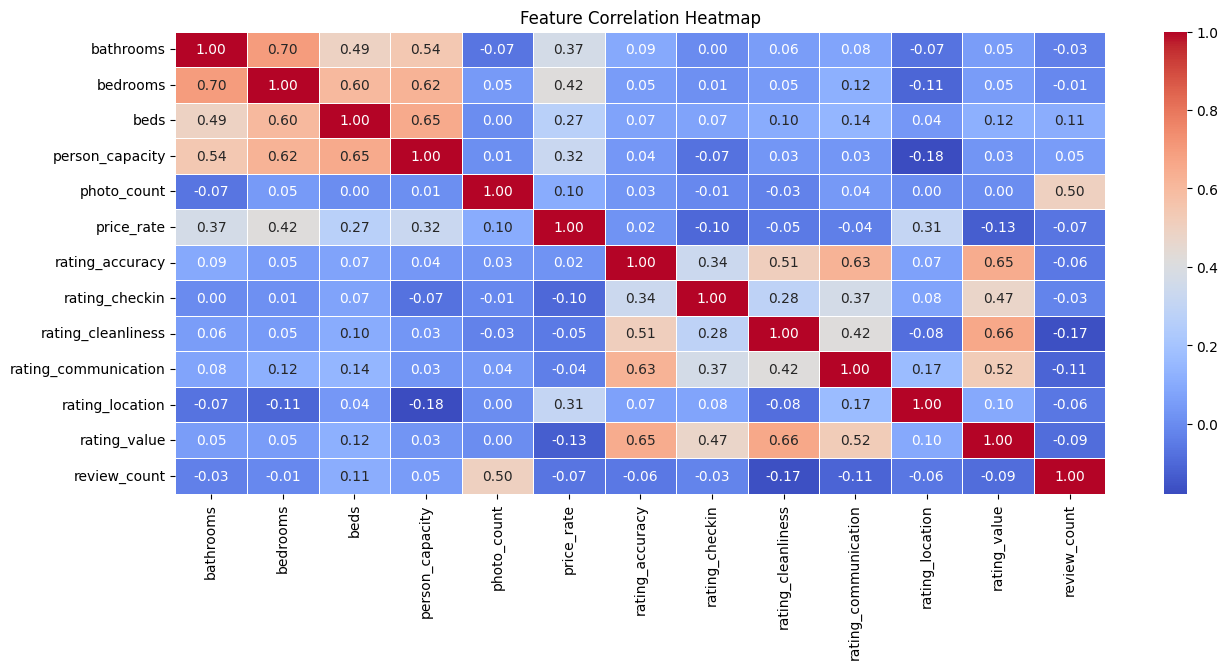

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df[["bathrooms", "bedrooms", "beds", "person_capacity", "photo_count", "price_rate", "rating_accuracy", "rating_checkin", "rating_cleanliness", "rating_communication", "rating_location", "rating_value", "review_count"]]

# Compute and visualize correlation matrix
plt.figure(figsize=(15, 6))  # Adjust figure size if needed
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [185]:
df["value_for_money"] = df[rating_columns].mean(axis=1) / df["price_rate"]
best_value = df.sort_values(by="value_for_money", ascending=False)
best_value.head(10)[["value_for_money", "price_rate", "url", "price_rate"] + rating_columns]


,value_for_money,price_rate,url,price_rate,rating_accuracy,rating_checkin,rating_cleanliness,rating_communication,rating_location,rating_value
483,inf,0.000000,https://www.airbnb.com/rooms/735593211294067049,0.000000,0.662651,0.769231,0.298507,0.835821,0.647887,0.701754
763,6.413875,0.120690,https://www.airbnb.com/rooms/24395241,0.120690,0.915663,0.846154,0.865672,0.850746,0.394366,0.771930
931,6.317395,0.137931,https://www.airbnb.com/rooms/1098384505144679778,0.137931,0.879518,0.897436,0.776119,0.970149,0.915493,0.789474
1018,5.202840,0.137931,https://www.airbnb.com/rooms/1294196367017965348,0.137931,0.915663,1.000000,0.507463,0.895522,0.338028,0.649123
915,4.503639,0.189655,https://www.airbnb.com/rooms/1293593886360871762,0.189655,0.867470,0.717949,1.000000,1.000000,0.732394,0.807018
913,4.207891,0.206897,https://www.airbnb.com/rooms/1231338947663092178,0.206897,0.915663,1.000000,0.895522,1.000000,0.535211,0.877193
920,3.913790,0.224138,https://www.airbnb.com/rooms/1172773904801819347,0.224138,0.963855,1.000000,0.895522,0.850746,0.676056,0.877193
925,3.858551,0.206897,https://www.airbnb.com/rooms/852852924593108806,0.206897,0.891566,0.769231,0.940299,0.970149,0.323944,0.894737
1080,3.611567,0.189655,https://www.airbnb.com/rooms/1297321206493545361,0.189655,0.795181,0.358974,1.000000,0.746269,0.647887,0.561404
981,3.586305,0.172414,https://www.airbnb.com/rooms/49571528,0.172414,0.771084,0.769231,0.358209,0.626866,0.605634,0.578947


In [186]:
df["reliability_score"] = ((df["review_count"]*0.5) + (df["rating_location"]*0.3) + df["rating_value"]*0.2)
best_reliable = df.sort_values(by="reliability_score", ascending=False)
best_reliable[["reliability_score", "review_count", "rating_location", "rating_value", "url"]].head(20)


,reliability_score,review_count,rating_location,rating_value,url
499,0.786237,1.000000,0.591549,0.543860,https://www.airbnb.com/rooms/11253241
519,0.678256,0.578652,0.816901,0.719298,https://www.airbnb.com/rooms/20911638
90,0.664484,0.619850,0.830986,0.526316,https://www.airbnb.com/rooms/2660266
95,0.658580,0.460674,0.830986,0.894737,https://www.airbnb.com/rooms/19356937
964,0.652076,0.464419,0.873239,0.789474,https://www.airbnb.com/rooms/16399123
75,0.651455,0.397004,0.971831,0.807018,https://www.airbnb.com/rooms/24498323
1107,0.651109,0.501873,0.830986,0.754386,https://www.airbnb.com/rooms/34339024
65,0.646214,0.644195,0.577465,0.754386,https://www.airbnb.com/rooms/20803199
914,0.624892,0.449438,0.830986,0.754386,https://www.airbnb.com/rooms/16399655
168,0.623510,0.342697,0.887324,0.929825,https://www.airbnb.com/rooms/35494480


In [187]:
import folium
import pandas as pd

# Create a Folium map centered at the average location
m = folium.Map(location=[df["latitude"].mean(), df["longitude"].mean()], zoom_start=12)

# Add markers to the map
for _, row in df.iterrows():
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup=row[["name", "original_price_rate", "url"]],
        tooltip=row[["name"]]
    ).add_to(m)

# Show map (if running in Jupyter Notebook)
m


In [188]:
import folium
import pandas as pd
from shapely.geometry import Point, Polygon

# Sample DataFrame with points and URLs
data = {
    "name": ["Place A", "Place B", "Place C"],
    "latitude": [-23.55052, -22.9083, -25.4284],
    "longitude": [-46.6333, -43.1964, -49.2733],
    "url": ["https://example.com/a", "https://example.com/b", "https://example.com/c"]
}

df = pd.DataFrame(data)

# Coordinates for the polyline (line to draw)
polyline_coords = [
    [-23.55052, -46.6333],  # Point A
    [-22.9083, -43.1964],   # Point B
    [-25.4284, -49.2733]    # Point C
]

# Create a Folium map centered at the average location
m = folium.Map(location=[df["latitude"].mean(), df["longitude"].mean()], zoom_start=6)

# Draw the polyline (line) on the map
folium.PolyLine(polyline_coords, color="blue", weight=2.5, opacity=1).add_to(m)

# Convert polyline to Polygon (closed loop) for point containment check
polygon = Polygon(polyline_coords)

# List to store URLs of points inside the polyline (polygon)
inside_urls = []

# Check if each point is inside the polyline (polygon)
for _, row in df.iterrows():
    point = Point(row["longitude"], row["latitude"])  # Create a point from latitude and longitude
    if polygon.contains(point):  # Check if the point is inside the polygon
        inside_urls.append(row["url"])  # Add the URL to the list if inside

# Show the map
m

